### Load the Dataset and Perform EDA

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('EastWestAirlines.csv')
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [5]:
# Initial exploration
print(df.info())  # Check data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB
None


In [7]:
print(df.describe())  # Summary statistics

               ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      

In [9]:
print(df.head())  # Preview first few rows

   ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1  


### Data Preprocessing

In [14]:
df.fillna(df.mean(), inplace=True)  # Example of imputing missing values with the mean

In [16]:
#Remove Outliers
from scipy import stats

z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))
df = df[(z_scores < 3).all(axis=1)]  # Remove data points with z-score greater than 3
df

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.select_dtypes(include=['float64', 'int64']))
df_scaled

array([[-1.76632543, -0.52326043, -0.15886912, ..., -0.43177507,
         1.43143767, -0.71809304],
       [-1.76546049, -0.66708419, -0.15886912, ..., -0.43177507,
         1.41584783, -0.71809304],
       [-1.76459555, -0.30974703, -0.15886912, ..., -0.43177507,
         1.44800188, -0.71809304],
       ...,
       [ 1.70900444,  0.21135753, -0.15886912, ..., -0.43177507,
        -1.29581034,  1.3925772 ],
       [ 1.70986938, -0.0908356 , -0.15886912, ...,  0.11817002,
        -1.29629752, -0.71809304],
       [ 1.71073432, -0.9293577 , -0.15886912, ..., -0.43177507,
        -1.29775907, -0.71809304]])

### visualization

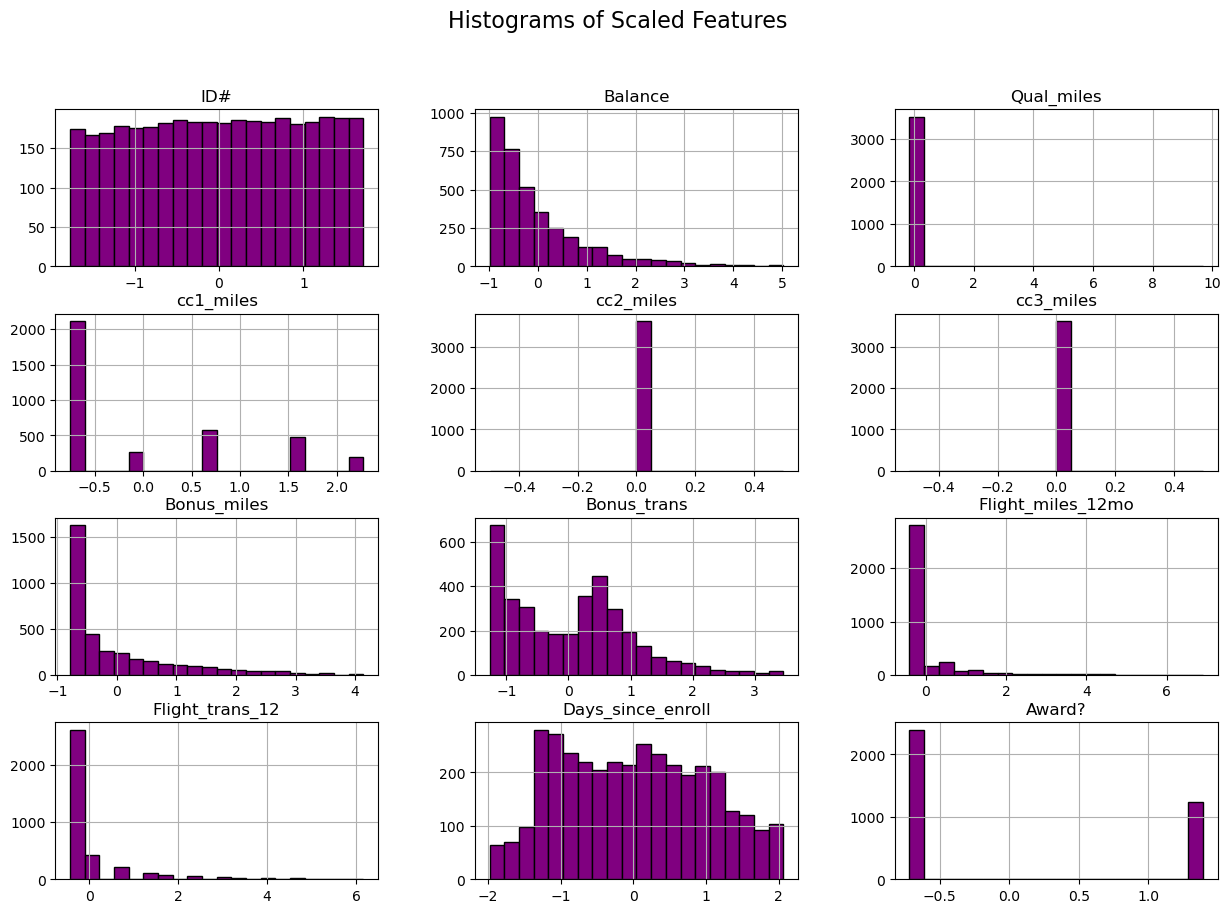

In [31]:
# Convert scaled data to DataFrame for easier plotting
df_scaled_df = pd.DataFrame(df_scaled, columns=df.select_dtypes(include=['float64', 'int64']).columns)
df_scaled_df.hist(bins=20, figsize=(15, 10), color='purple', edgecolor='black')
plt.suptitle('Histograms of Scaled Features', fontsize=16)
plt.show()

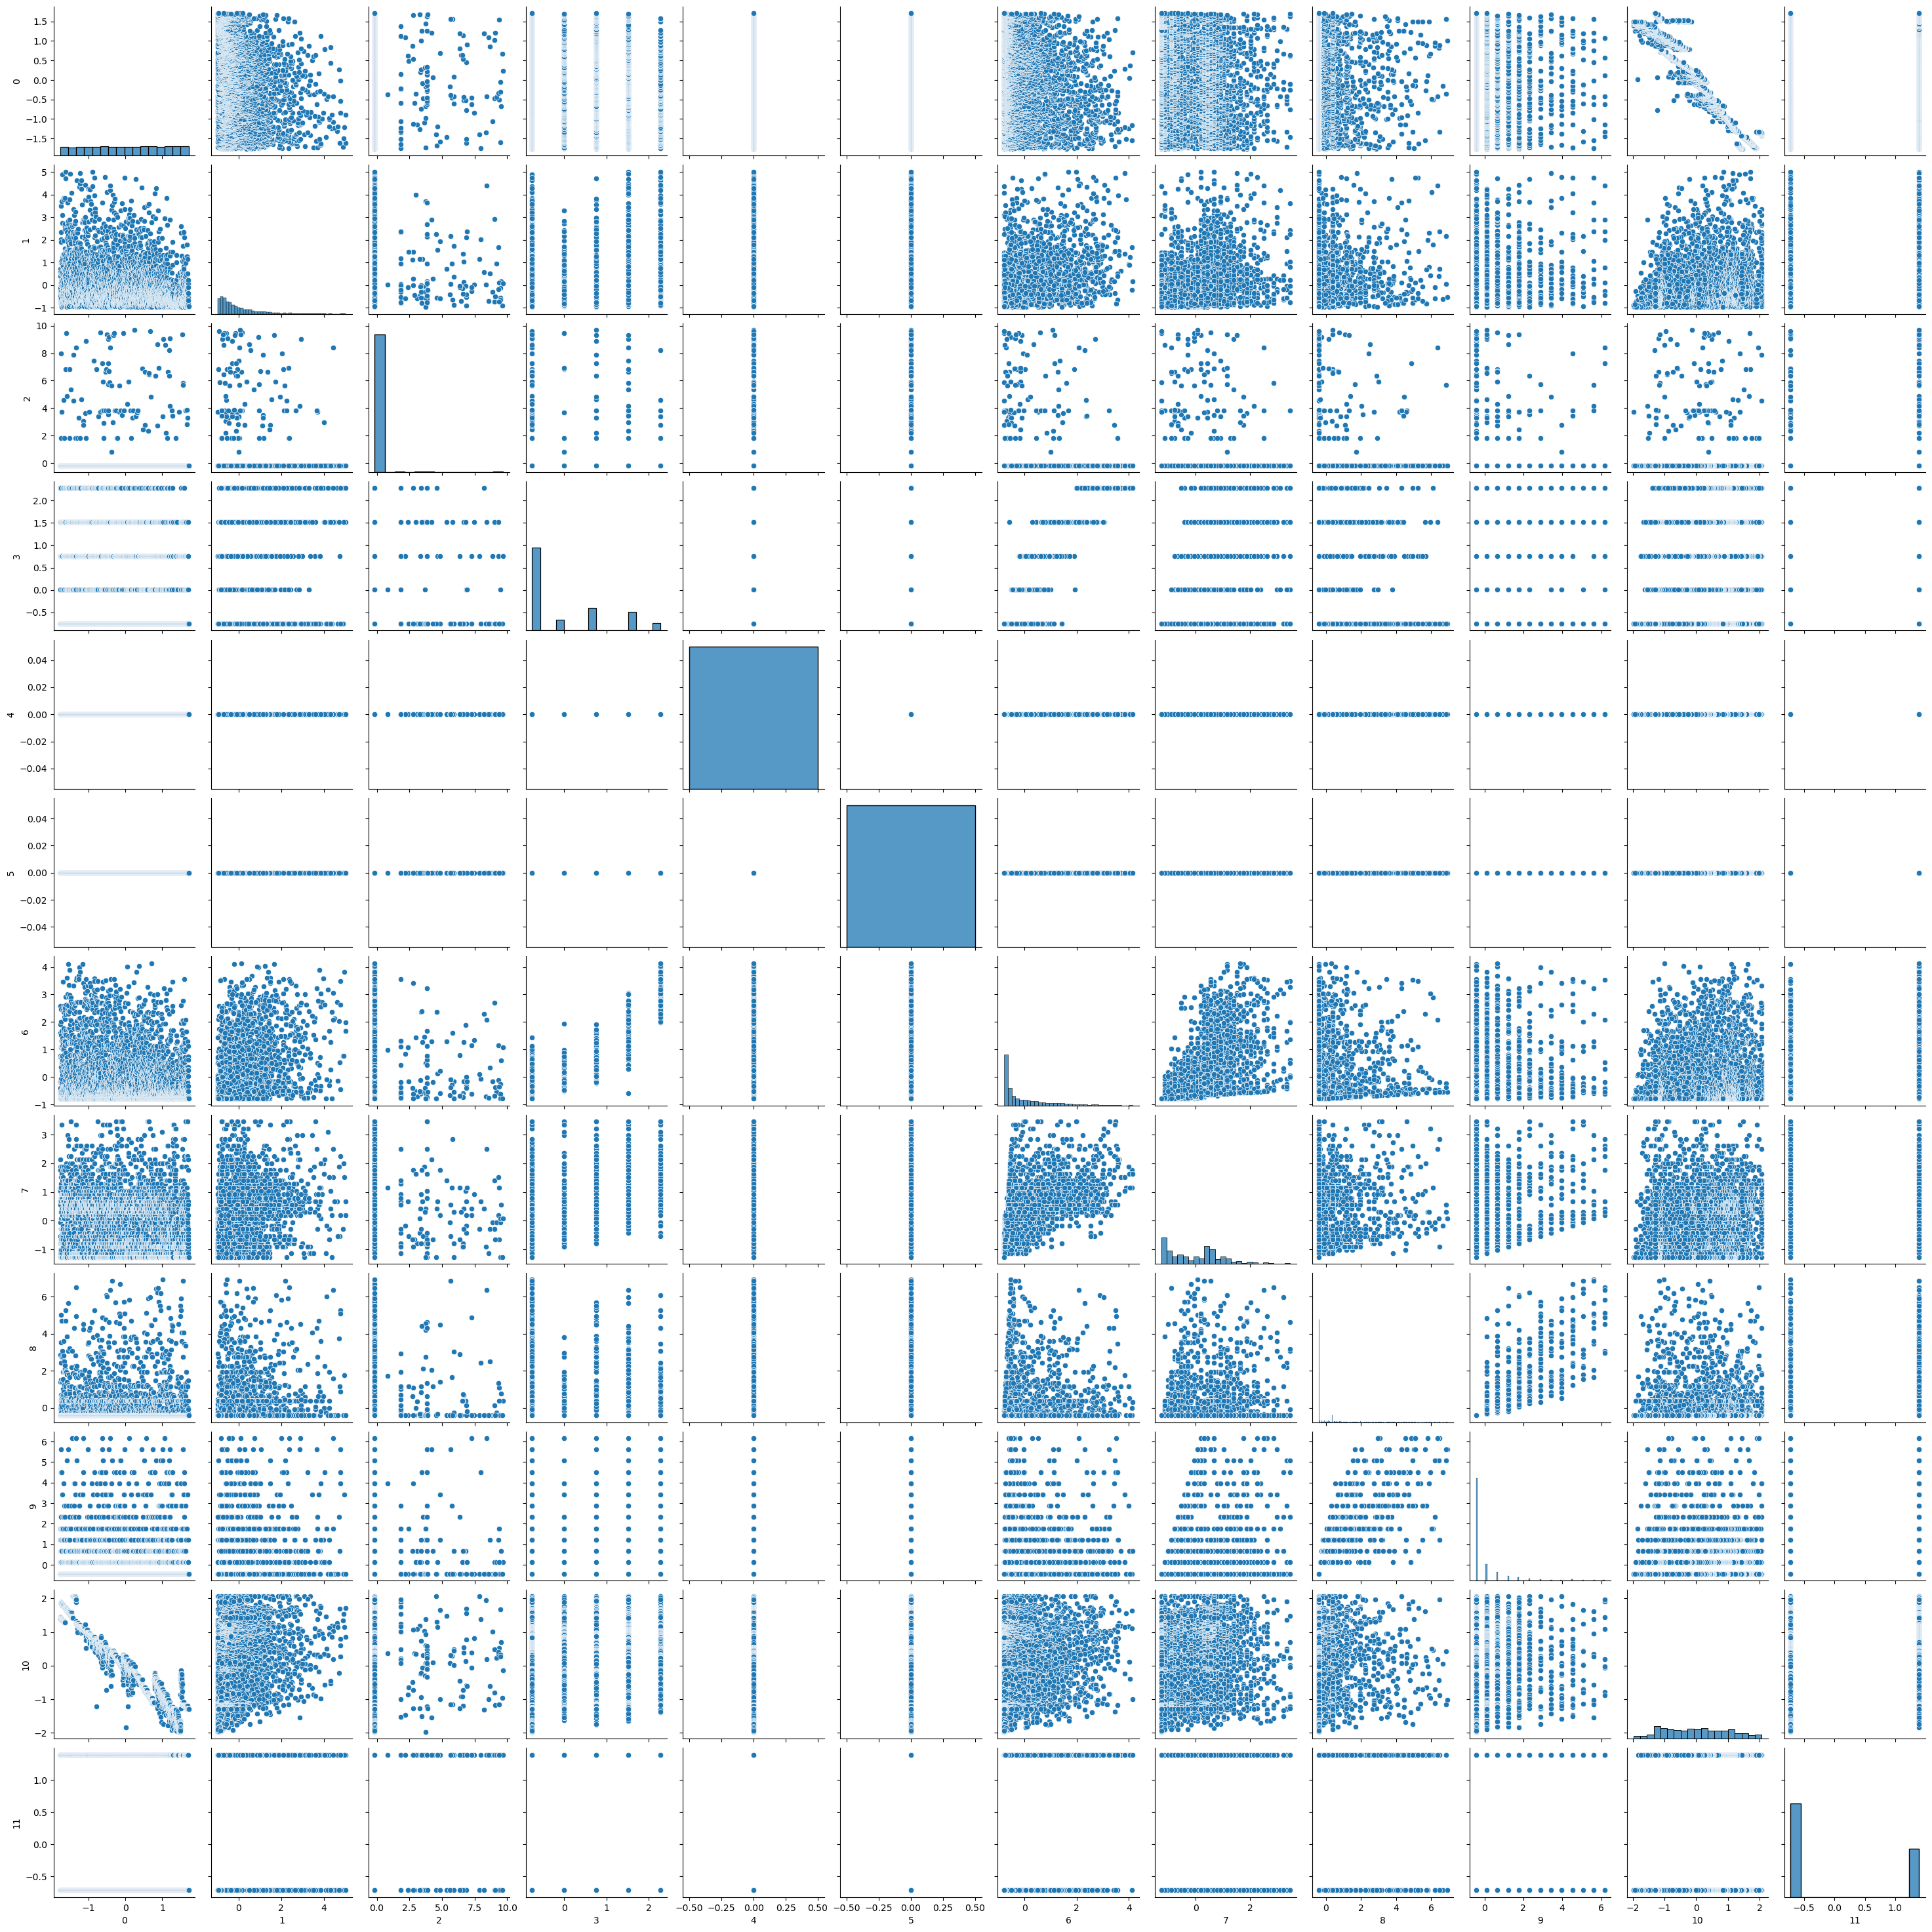

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(pd.DataFrame(df_scaled))
plt.show()

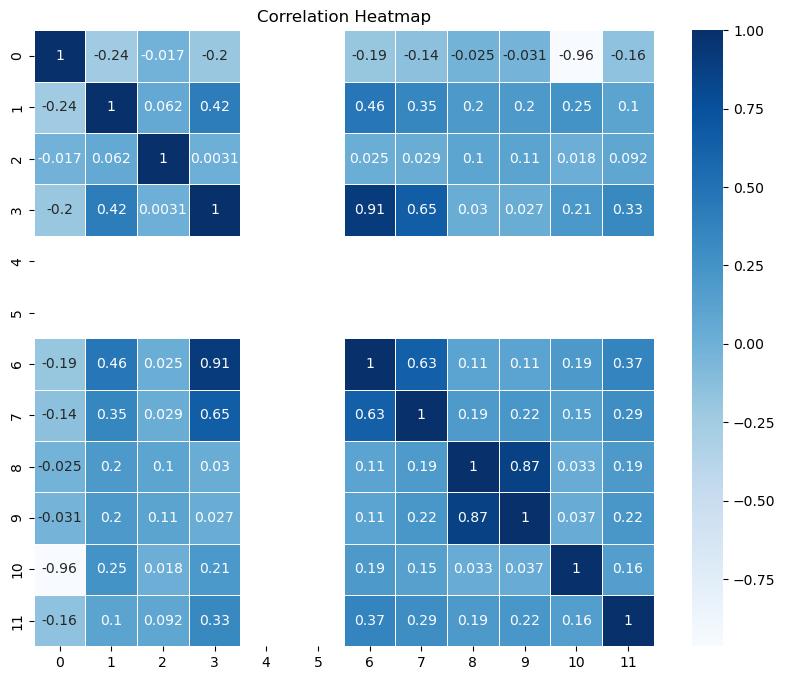

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Implementing Clustering Algorithms
#### K-Means Clustering

In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [41]:
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

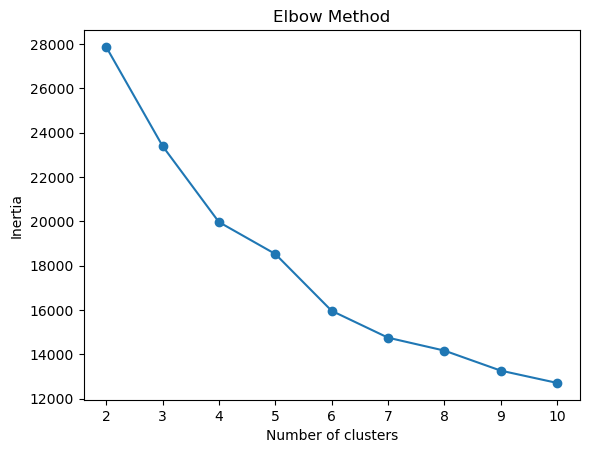

In [43]:
# Plot Elbow Curve
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [45]:
# K-Means Clustering with Optimal K
optimal_k = 4  # Based on elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

In [49]:
kmeans

KMeans(n_clusters=4, random_state=42)

In [51]:
kmeans_labels

array([0, 0, 0, ..., 3, 3, 3])

In [62]:
# Silhouette Score
silhouette_kmeans = silhouette_score(df_scaled, kmeans_labels)
print(f'Silhouette Score for K-Means: {silhouette_kmeans:4f}')

Silhouette Score for K-Means: 0.242330


#### Hierarchical Clustering

In [54]:
# Applying Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering

hierarchical = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(df_scaled)

In [56]:
hierarchical

AgglomerativeClustering(n_clusters=4)

In [58]:
hierarchical_labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [64]:
# Silhouette Score
silhouette_hierarchical = silhouette_score(df_scaled, hierarchical_labels)
print(f'Silhouette Score for Hierarchical Clustering: {silhouette_hierarchical:4f}')

Silhouette Score for Hierarchical Clustering: 0.279611


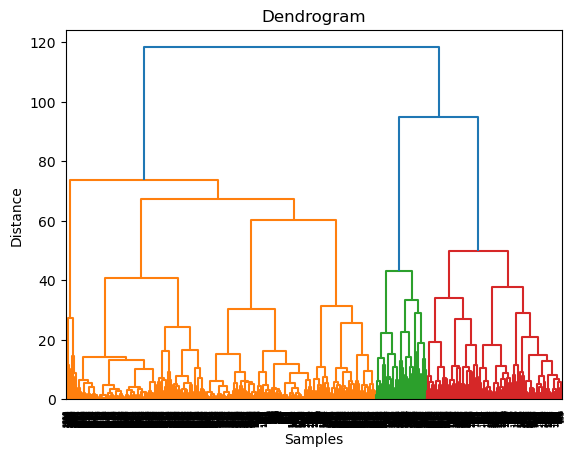

In [71]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_matrix = linkage(df_scaled, method='ward')
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

#### DBSCAN Clustering

In [74]:
#Applying DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)

# Silhouette Score
silhouette_dbscan = silhouette_score(df_scaled, dbscan_labels)
print(f'Silhouette Score for DBSCAN: {silhouette_dbscan:4f}')

Silhouette Score for DBSCAN: -0.399455


In [78]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

def evaluate_dbscan(eps_values, min_samples_values, data):
    best_score = -1
    best_params = {}
    
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(data)
            
            # Only calculate silhouette score if we have more than one cluster
            if len(set(labels)) > 1:
                score = silhouette_score(data, labels)
                print(f'Eps: {eps}, MinPts: {min_samples}, Silhouette Score: {score}')
                
                if score > best_score:
                    best_score = score
                    best_params = {'eps': eps, 'min_samples': min_samples}
    
    print(f'Best params: Eps={best_params["eps"]}, MinPts={best_params["min_samples"]}, Best Silhouette Score: {best_score}')
    return best_params

In [86]:
# Define the range of eps and min_samples values to experiment with
eps_values = [0.3, 0.4, 0.5, 0.6, 0.7]
min_samples_values = [3, 5, 7, 10]

# Run DBSCAN experiments
best_params = evaluate_dbscan(eps_values, min_samples_values, df_scaled)

Eps: 0.3, MinPts: 3, Silhouette Score: -0.49036503629981
Eps: 0.3, MinPts: 5, Silhouette Score: -0.3081804333385324
Eps: 0.3, MinPts: 7, Silhouette Score: -0.2851759985339634
Eps: 0.3, MinPts: 10, Silhouette Score: -0.17914961515241837
Eps: 0.4, MinPts: 3, Silhouette Score: -0.4406431096923323
Eps: 0.4, MinPts: 5, Silhouette Score: -0.42477586026526076
Eps: 0.4, MinPts: 7, Silhouette Score: -0.26235372693152753
Eps: 0.4, MinPts: 10, Silhouette Score: -0.15356125573104518
Eps: 0.5, MinPts: 3, Silhouette Score: -0.40560515380601536
Eps: 0.5, MinPts: 5, Silhouette Score: -0.3994552312980999
Eps: 0.5, MinPts: 7, Silhouette Score: -0.3461961287792837
Eps: 0.5, MinPts: 10, Silhouette Score: -0.2450984002013958
Eps: 0.6, MinPts: 3, Silhouette Score: -0.35509210532510005
Eps: 0.6, MinPts: 5, Silhouette Score: -0.3473549269206878
Eps: 0.6, MinPts: 7, Silhouette Score: -0.21405480112761724
Eps: 0.6, MinPts: 10, Silhouette Score: -0.24081879175938808
Eps: 0.7, MinPts: 3, Silhouette Score: -0.1313

K-Means: Use the Elbow method to determine the best number of clusters.

Hierarchical: Experiment with different linkage methods and evaluate the silhouette score.
    
DBSCAN: Tune eps and min_samples for optimal clustering.
    
The silhouette score helps in selecting the best algorithm and parameters for your dataset.

### Visualization of Clusters

#### Visualizing K-Means Clusters

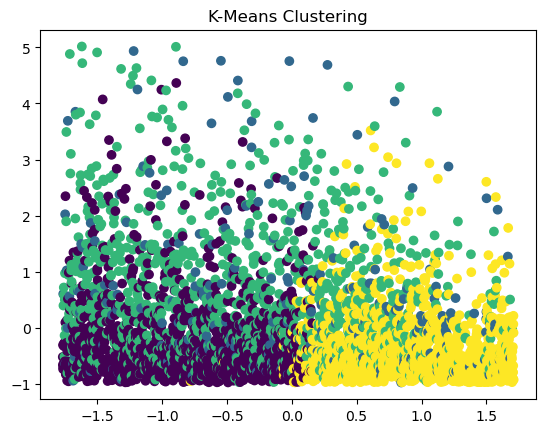

In [92]:
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.show()

#### Visualizing Hierarchical Clusters

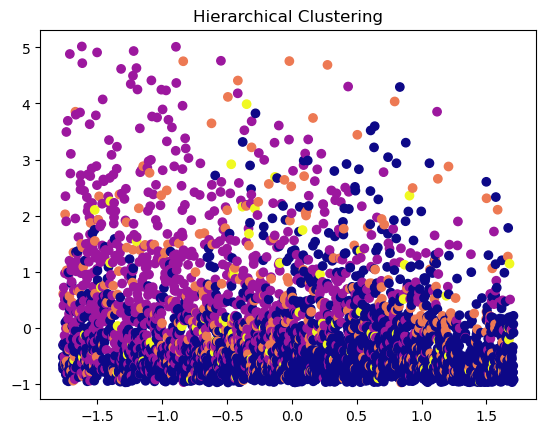

In [95]:
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=hierarchical_labels, cmap='plasma')
plt.title('Hierarchical Clustering')
plt.show()

#### Visualizing DBSCAN Clusters

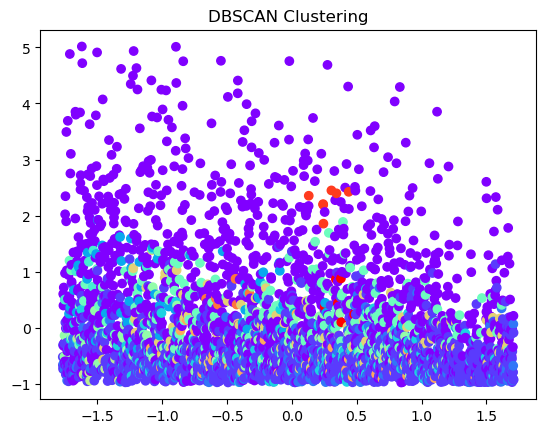

In [98]:
plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=dbscan_labels, cmap='rainbow')
plt.title('DBSCAN Clustering')
plt.show()

### Evaluation Metrics

#### Silhouette Score Comparison

In [106]:
print(f'K-Means Silhouette Score: {silhouette_kmeans:4f}')
print(f'Hierarchical Clustering Silhouette Score: {silhouette_hierarchical:4f}')
print(f'DBSCAN Silhouette Score: {silhouette_dbscan:4f}')

K-Means Silhouette Score: 0.242330
Hierarchical Clustering Silhouette Score: 0.279611
DBSCAN Silhouette Score: -0.399455
